## Xingyu Liu DAV 6150 - Assignment 7

## Introduction

In this report, I will be applying the full data science project lifecycle to the implementation of logistic regression model on a data set consisting of data on 12 different conditions on mortgage lender to find the best logistic regression model for the "deny" attribute. This information will be used by either a bank manager to judge whether the discrimination in mortage exists, or by the borrower who wants to loan from bank to predict the successful rate of the mortgage based on his private situation. borrowers will use these predictions to choose whether or not to loan from the bank, the bank manager will use the predictions to see whether the discrimination exists in working process, and then adjust the administration strategy. 

To accomplish this, I will first perform an exploratory data analysis ("EDA") on each of the variables in an effort to discover any data integrity issues (i.e. missing or invalid values), uncover any outliers, and see the distribution of our data. 

Then, based on the results of our EDA, I will perform the necessary data preparation and cleaning in order to prepare the data for use in a machine learning model. This work will be guided by our domain knowledge and our EDA. I will again perform an EDA on our transformed data, in order to see the effects of our transformations on the data. We will compare the results of our transformed data to those of the original data and discuss how our transformations will lead to a better machine learning model.

After the data preparation I will perform feature selection and/or dimensionality reduction using a variety of methods that will be discussed further in that section. 

Then I will create different logistic regression models based on different exploratory variables,to see which model best predicts the "deny" attribute.

Lastly, I will split the data into training and testing data set, choose the best model and fit this model with previously test data to see how our model performs on this test data. 

## Data Profiling & Domain Knowledge Development

**dir** debt payments to total income ratio: Your debt-to-income ratio is all your monthly debt payments divided by your gross monthly income. This number is one way lenders measure your ability to manage the monthly payments to repay the money you plan to borrow. ... To calculate your debt-to-income ratio, you add up all your monthly debt payments and divide them by your gross monthly income. Evidence from studies of mortgage loans suggest that borrowers with a higher debt-to-income ratio are more likely to run into trouble making monthly payments. The 43 percent debt-to-income ratio is important because, in most cases, that is the highest ratio a borrower can have and still get a Qualified Mortgage. According to [this link](https://www.consumerfinance.gov/ask-cfpb/what-is-a-debt-to-income-ratio-why-is-the-43-debt-to-income-ratio-important-en-1791/#:~:text=Your%20debt%2Dto%2Dincome%20ratio,money%20you%20plan%20to%20borrow.&text=If%20your%20gross%20monthly%20income,income%20ratio%20is%2033%20percent.).

**hir** housing expenses to income ratio，the housing expense ratio is the percentage of your gross monthly income devoted to housing expenses. Your lender uses a top ratio and a bottom ratio in deciding what you can afford in housing expenses. The top ratio is calculated by dividing your new monthly mortgage payment by your monthly gross income. Typically, this ratio should not exceed 28%. The bottom ratio is equal to your new monthly mortgage payment plus your monthly debt divided by your gross income per month. Typically, this ratio should not exceed 36%. According to [this link](https://www.quickenloans.com/mortgage-glossary/housing-expense-ratio)

**lvr** ratio of size of loan to assessed value of property, loan to Value Ratio is calculated by dividing the loan amount by the actual purchase price or valuation of the property, then multiplying it by 100. Generally, full doc applicants (income evidence provided) can borrow up to 80% LVR. However, strong applicants can potentially borrow between 90% and 95% LVR! Low doc applicants (self employed with no income evidence) can borrow up to 60% and possibly up to 80% LVR, if they’re in a strong financial position. According to [this link](https://www.homeloanexperts.com.au/home-loan-articles/loan-to-value-ratio-lvr/#:~:text=Loan%20details-,How%20is%20LVR%20calculated%3F,security%20is%20valued%20at%20%24300%2C000.)

**ccs** consumer credit score from 1 to 6 (a low value being a good score)

**mcs** mortgage credit score from 1 to 4 (a low value being a good score)

**pbcr** public bad credit record: Public records come from government documents. A public record with adverse information could indicate you stopped paying your debt, which could crush your credit.

You may notice a “public record” on your credit reports after the following events:

- You declare bankruptcy
- You lose your home through foreclosure
- You don’t pay your taxes
- You’re sued and owe a debt through the court as a result

According to [this link](https://www.creditkarma.com/advice/i/long-public-records-stay-credit-report#:~:text=Public%20records%20could%20plague%20your,your%20credit%20reports%20by%20mistake.)

**dmi** denied mortgage insurance: Mortgage insurance is designed to protect your lender in case you default on your home loan. Whether you should get mortgage insurance or will be required to have it, depends on the terms of your loan. The actual premium you pay depends on the loan type, loan terms, and your risk level.

**self** self employed: A self-employed person refers to any person who earns their living from any independent pursuit of economic activity as opposed to earning a living working for a company or another individual (an employer). In the United States, any person is considered self-employed for tax purposes if that person is running a business as a sole proprietorship, independent contractor, as a member of a partnership, or as a member of a limited liability company that does not elect to be treated as a corporation.

**single** is the applicant single (unmarried)?

**uria** 1989 Massachusetts unemployment rate in the applicant's industry

**condominium**  is unit a condominium? A condominium, often shortened to condo in the United States and in most Canadian provinces, is a type of living space similar to an apartment but independently sellable and therefore regarded as real estate. According to [this link](https://en.wikipedia.org/wiki/Condominium)

**black** is the applicant black?

**deny** mortgage application denied?

## Exploratory Data Analysis

First I will read the data into python using pandas read xls function. Then we will look for missing and/or invalid data values and perform an exploratory data analysis on dataset to determine what data need to be prepared for a future machine learning model. 

In [123]:
#first import the necessary libraries and modules
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn as metrics

mortgage = pd.read_excel("M7_Data.xls")

#check results
mortgage.head()

,Unnamed: 0,dir,hir,lvr,ccs,mcs,pbcr,dmi,self,single,uria,comdominiom,black,deny
0,1,0.221,0.221,0.800000,5.0,2.0,no,no,no,no,3.9,0,no,no
1,2,0.265,0.265,0.921875,2.0,2.0,no,no,no,yes,3.2,0,no,no
2,3,0.372,0.248,0.920398,1.0,2.0,no,no,no,no,3.2,0,no,no
3,4,0.320,0.250,0.860465,1.0,2.0,no,no,no,no,4.3,0,no,no
4,5,0.360,0.350,0.600000,1.0,1.0,no,no,no,no,3.2,0,no,no


In [3]:
#check the dataset for null values
mortgage.isnull().sum()

Unnamed: 0     0
dir            0
hir            0
lvr            0
ccs            0
mcs            0
pbcr           1
dmi            0
self           1
single         0
uria           0
comdominiom    0
black          0
deny           0
dtype: int64

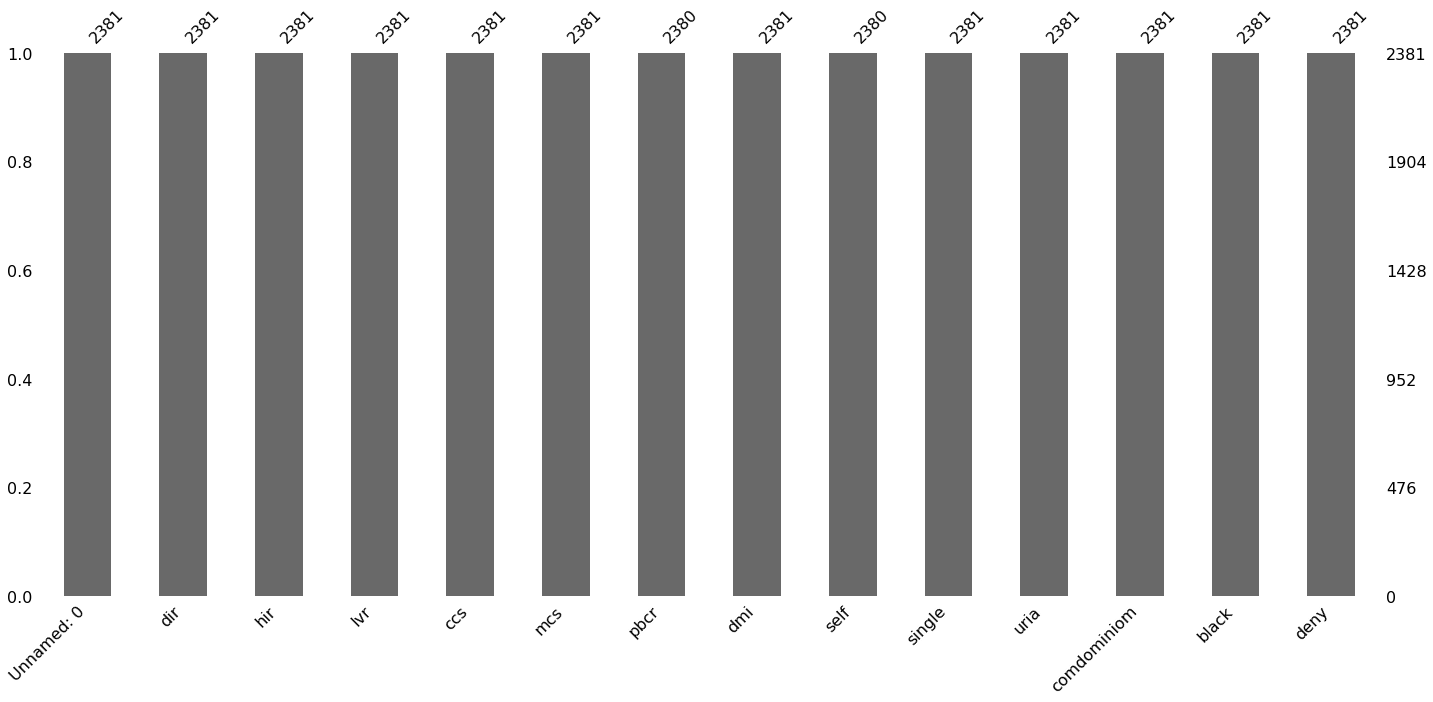

In [4]:
#first import missingno after pip install
import missingno as msno

#visualize the amount of missing data using missingno's bar chart
msno.bar(mortgage);

I see that the variables pbcr, self having missing values of all variables. But very seldom.  

In [5]:
#get summary statistics for each variable, including mean, standard deviation, median, quartiles, and range
mortgage.describe()

,Unnamed: 0,dir,hir,lvr,ccs,mcs,uria,comdominiom
count,2381.000000,2381.000000,2381.000000,2381.000000,2381.000000,2381.000000,2381.000000,2381.000000
mean,1191.000000,0.330814,0.255346,0.737760,2.116387,1.721008,3.774496,0.288114
std,687.479818,0.107235,0.096635,0.178715,1.666370,0.537169,2.026636,0.452980
min,1.000000,0.000000,0.000000,0.020000,1.000000,1.000000,1.800000,0.000000
25%,596.000000,0.280000,0.214000,0.652850,1.000000,1.000000,3.100000,0.000000
50%,1191.000000,0.330000,0.260000,0.779412,1.000000,2.000000,3.200000,0.000000
75%,1786.000000,0.370000,0.298800,0.868421,2.000000,2.000000,3.900000,1.000000
max,2381.000000,3.000000,3.000000,1.950000,6.000000,4.000000,10.600000,1.000000


We see from above that the range of all variables are positive. 

Now we will investigate further to see if the locations of the missing data are correlated by using missingno library's heatmap function. This investigation will help us determine how to treat missing values in our data preparation phase. 

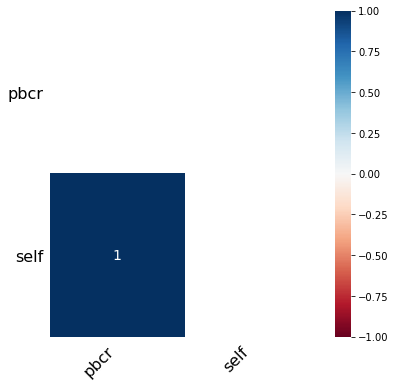

In [8]:
#graph a heat map of the missing data to see if the locations where the data are missing are correlated.
#code as referenced in O'Reilley's Machine Learning Pocket Reference
ax = msno.heatmap(mortgage, figsize = (6,6))
ax.get_figure(); #add a ; at the end to prevent it from displaying twice

I found the missing variables of self and pbcr have very strong correlation which equal to 1, that implies there may be causality between them. With my domian knowledge, self-employed persom has less stable income comparing with employed by others, self-employed person has more probability to delay the repayment of credit card loan, thus makes bad credit card record. Also, from data profiling, one person may notice a “public record” on credit reports after he declares bankruptcy and don’t pay taxes, the self-employed may have company, and he may have more invisible income which evades the taxes. In this case, the strong correlation may denote any situation. So I will fill in the missing values using my domian knowledge in the next section. That is, no self-employed made no public bad credit record.

In [12]:
#Fill in missing values 
mortgage = mortgage.replace(np.nan,'no')

Then I will plot the histograms for numeric variables:

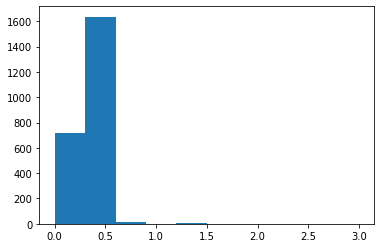

In [23]:
## Histogram of dir
plt.hist(mortgage['dir'], bins = 10)
plt.show()

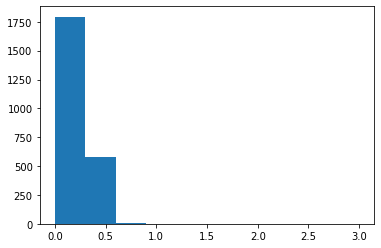

In [24]:
## Histogram of hir
plt.hist(mortgage['hir'], bins = 10)
plt.show()

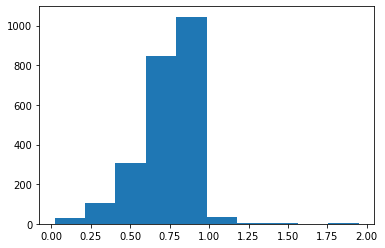

In [25]:
## Histogram of lvr
plt.hist(mortgage['lvr'], bins = 10)
plt.show()

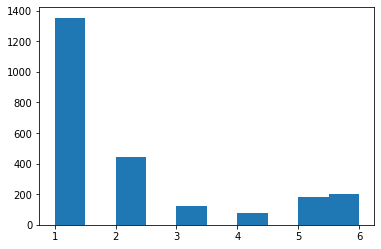

In [26]:
## Histogram of ccs
plt.hist(mortgage['ccs'], bins = 10)
plt.show()

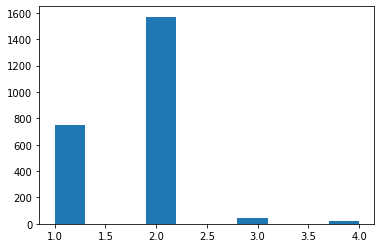

In [27]:
## Histogram of mcs
plt.hist(mortgage['mcs'], bins = 10)
plt.show()

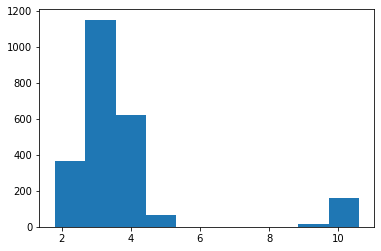

In [28]:
## Histogram of uria
plt.hist(mortgage['uria'], bins = 10)
plt.show()

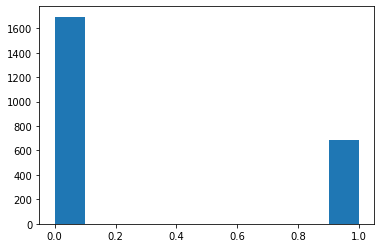

In [29]:
## Histogram of comdominiom
plt.hist(mortgage['comdominiom'], bins = 10)
plt.show()

From the above histograms, I see that the majority of our numeric attributes are with no specific distribution. Except dir, hir and lvr are a little skewed distributed.

Next we will look at boxplots of our data to see if there are any outliers.

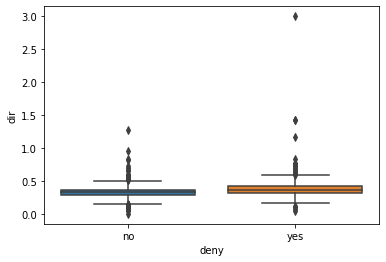

In [30]:
## Boxplot of dir
sns.boxplot(x='deny',y='dir',data = mortgage)

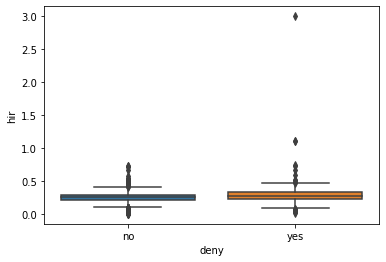

In [31]:
## Boxplot of dir
sns.boxplot(x='deny',y='hir',data = mortgage)

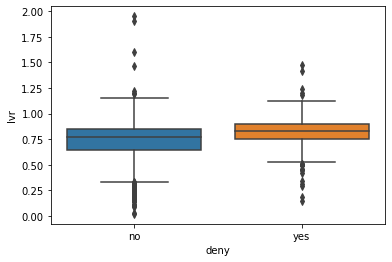

In [32]:
## Boxplot of lvr
sns.boxplot(x='deny',y='lvr',data = mortgage)

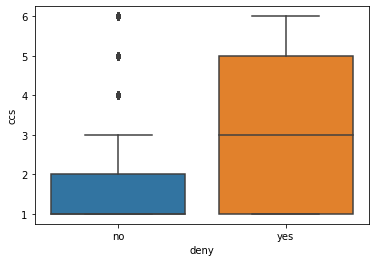

In [33]:
## Boxplot of ccs
sns.boxplot(x='deny',y='ccs',data = mortgage)

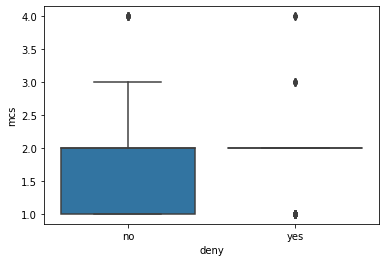

In [34]:
## Boxplot of mcs
sns.boxplot(x='deny',y='mcs',data = mortgage)

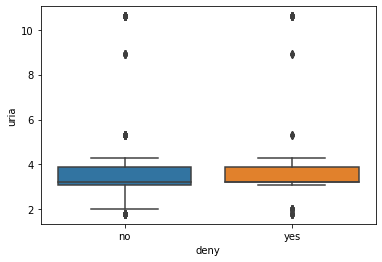

In [36]:
## Boxplot of uria
sns.boxplot(x='deny',y='uria',data = mortgage)

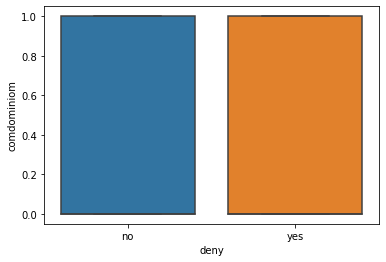

In [37]:
## Boxplot of comdominiom
sns.boxplot(x='deny',y='comdominiom',data = mortgage)

From the above boxplots I see that most of attributes have numerous outliers. I will discuss further below how I will deal with these outliers.


I will also check a correlation matrix between the variables before any transformation to see if my transformations have any effect on the correlation.

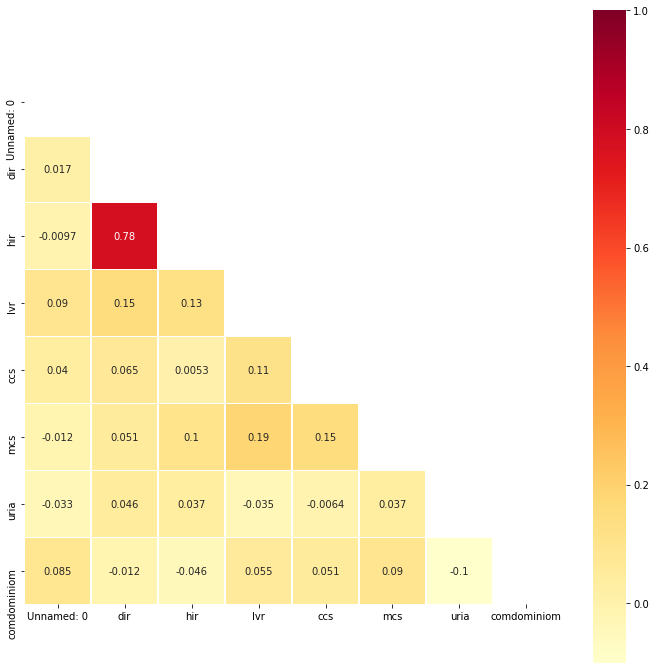

In [43]:
cor_matrix = mortgage.corr()
# Generate a mask for the upper triangle
mask = np.zeros_like(cor_matrix, dtype = np.bool)
mask[np.triu_indices_from(mask)] = True
# Set up the matplotlib figure
f, ax = plt.subplots(figsize = (12, 12))
#Draw the heatmap with the mask and correct aspect ratio,mask=True,upper triangular will be hide
sns.heatmap(cor_matrix, mask=mask,
            square = True, linewidths = .5, ax = ax, cmap = "YlOrRd",annot=True)

I see from our correlation matrix that the strongest correlation of 0.78 is between dir and hir. From the domian knowledge I know that the bottom ratio of hir is equal to your new monthly mortgage payment plus your monthly debt divided by your gross income per month. Typically, this ratio should not exceed 36%. Therefore, the correlation is reasonable in real life.

## Data Preparation and EDA Review - Eliminate invalid data using my domain knowledge.

I will now eliminate invalid data using my domain knowledge.

In [124]:
#copy the data frame 
mortgage2=mortgage.copy()

#remove rows that have a dir above 0.43
mortgage2=mortgage2[mortgage2.dir<0.43]

#remove rows that have a hir above 0.28
mortgage2=mortgage2[(mortgage2.hir<0.28)]

#remove rows that have a lvr below 0.60
mortgage2=mortgage2[(mortgage2.lvr>0.60)]

#check shape
mortgage2.shape

(1118, 14)

### Plot the histograms again to see whether the distributions have been changed:

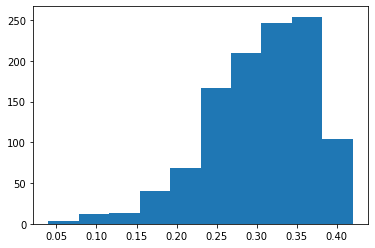

In [47]:
## Histogram of dir
plt.hist(mortgage2['dir'], bins = 10)
plt.show()

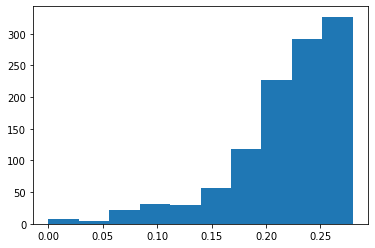

In [48]:
## Histogram of hir
plt.hist(mortgage2['hir'], bins = 10)
plt.show()

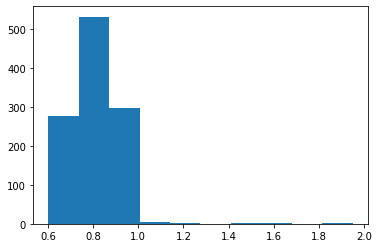

In [49]:
## Histogram of lvr
plt.hist(mortgage2['lvr'], bins = 10)
plt.show()

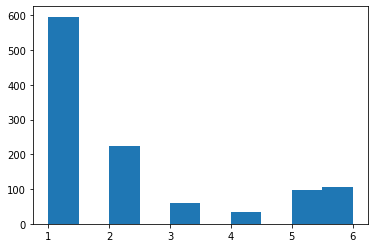

In [50]:
## Histogram of ccs
plt.hist(mortgage2['ccs'], bins = 10)
plt.show()

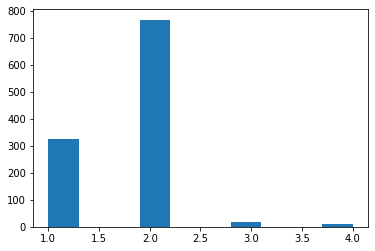

In [51]:
## Histogram of mcs
plt.hist(mortgage2['mcs'], bins = 10)
plt.show()

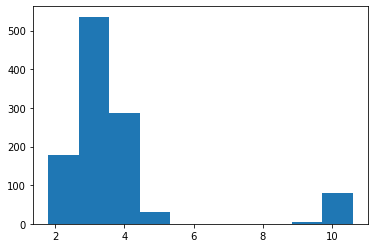

In [52]:
## Histogram of uria
plt.hist(mortgage2['uria'], bins = 10)
plt.show()

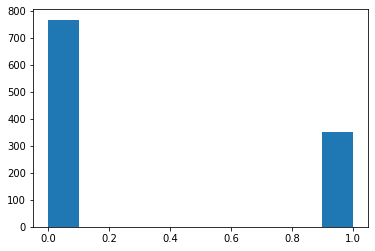

In [53]:
## Histogram of comdominiom
plt.hist(mortgage2['comdominiom'], bins = 10)
plt.show()

The histograms show dir and hir have been skewed left, lvr has been become normal distribution. Others remain the same.

Also, I will plot the boxplots again:

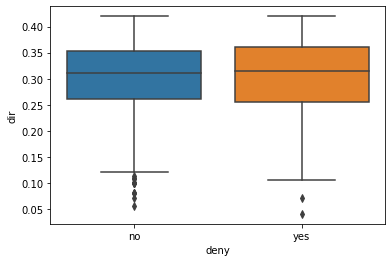

In [54]:
## Boxplot of dir
sns.boxplot(x='deny',y='dir',data = mortgage2)

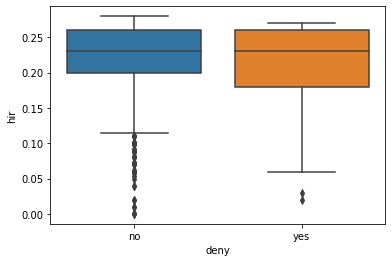

In [55]:
## Boxplot of dir
sns.boxplot(x='deny',y='hir',data = mortgage2)

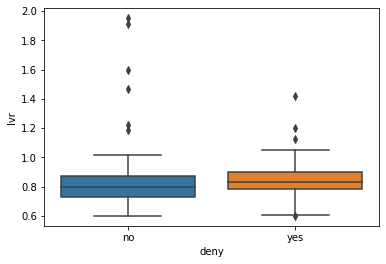

In [56]:
## Boxplot of lvr
sns.boxplot(x='deny',y='lvr',data = mortgage2)

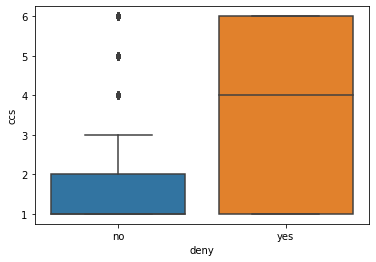

In [57]:
## Boxplot of ccs
sns.boxplot(x='deny',y='ccs',data = mortgage2)

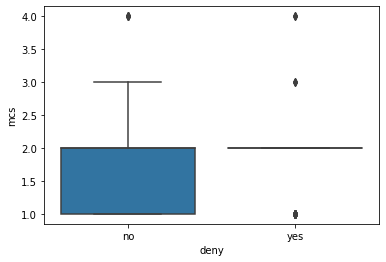

In [58]:
## Boxplot of mcs
sns.boxplot(x='deny',y='mcs',data = mortgage2)

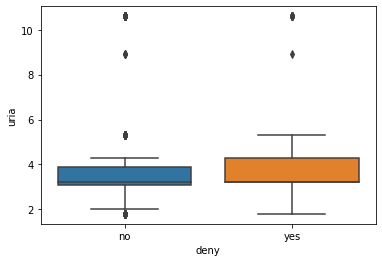

In [59]:
## Boxplot of uria
sns.boxplot(x='deny',y='uria',data = mortgage2)

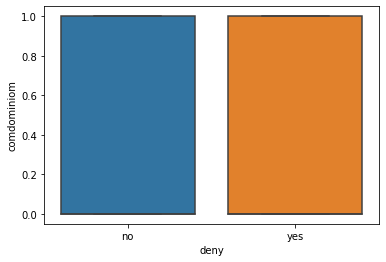

In [60]:
## Boxplot of comdominiom
sns.boxplot(x='deny',y='comdominiom',data = mortgage2)

The boxplots show the outliers have been changed too much: the outliers of dir have been moved to the downside, so as hir. The outliers of lvr have been moved to the upside, the outliers of 'yes' of uria have been moved to the upside. That means the invalid values truly cause a lot of outliers. 

## Working with Outliers: Correcting or Removing

### IQR score -
- Box plot use the IQR method to display data and outliers(shape of the data) but in order to be get a list of identified outlier, we will need to use the mathematical formula and retrieve the outlier data.
- The interquartile range (IQR), also called the midspread or middle 50%, or technically H-spread, is a measure of statistical dispersion, being equal to the difference between 75th and 25th percentiles, or between upper and lower quartiles, IQR = Q3 − Q1.
- In other words, the IQR is the first quartile subtracted from the third quartile; these quartiles can be clearly seen on a box plot on the data.
- It is a measure of the dispersion similar to standard deviation or variance, but is much more robust against outliers.
- IQR is somewhat similar to Z-score in terms of finding the distribution of data and then keeping some threshold to identify the outlier.
- First I will calculate IQR:

In [61]:
Q1 = mortgage2.quantile(0.25)
Q3 = mortgage2.quantile(0.75)
IQR = Q3 - Q1
print(IQR)

Unnamed: 0     1211.250000
dir               0.096725
hir               0.060600
lvr               0.146109
ccs               2.000000
mcs               1.000000
uria              0.800000
comdominiom       1.000000
dtype: float64


I got IQR for each column.
As we now have the IQR scores, it’s time to get hold on outliers. The below code will give an output with some true and false values. The data point where we have False that means these values are valid whereas True indicates presence of an outlier.

In [64]:
print (((mortgage2 < (Q1 - 1.5 * IQR)) | (mortgage > (Q3 + 1.5 * IQR))))

      Unnamed: 0  black    ccs  comdominiom   deny    dir    dmi    hir  \
0          False  False  False        False  False  False  False  False   
1          False  False  False        False  False  False  False  False   
2          False  False  False        False  False  False  False  False   
3          False  False  False        False  False  False  False  False   
4          False  False  False        False  False  False  False  False   
...          ...    ...    ...          ...    ...    ...    ...    ...   
2376       False  False  False        False  False  False  False  False   
2377       False  False  False        False  False  False  False  False   
2378       False  False  False        False  False  False  False  False   
2379       False  False  False        False  False  False  False  False   
2380       False  False  False        False  False  False  False  False   

        lvr    mcs   pbcr   self  single   uria  
0     False  False  False  False   False  False  

### Filter out the outliers by keeping only valid values.

In [125]:
mortgage3 = mortgage2.copy()
data_out = mortgage3[~((mortgage3 < (Q1 - 1.5 * IQR)) |(mortgage3 > (Q3 + 1.5 * IQR))).any(axis=1)]
data_out.shape

(833, 14)

In [66]:
data_out

,Unnamed: 0,dir,hir,lvr,ccs,mcs,pbcr,dmi,self,single,uria,comdominiom,black,deny
0,1,0.221000,0.221000,0.800000,5.000000,2.000000,no,no,no,no,3.900000,0,no,no
1,2,0.265000,0.265000,0.921875,2.000000,2.000000,no,no,no,yes,3.200000,0,no,no
2,3,0.372000,0.248000,0.920398,1.000000,2.000000,no,no,no,no,3.200000,0,no,no
3,4,0.320000,0.250000,0.860465,1.000000,2.000000,no,no,no,no,4.300000,0,no,no
8,9,0.310000,0.240000,0.897260,2.000000,2.000000,no,yes,no,no,3.100000,0,no,yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2374,2375,0.330000,0.160000,0.803030,5.000000,1.000000,no,no,no,no,3.200000,0,no,no
2375,2376,0.310000,0.250000,0.800000,1.000000,1.000000,no,no,yes,no,3.200000,0,no,no
2378,2379,0.320000,0.260000,0.753846,6.000000,1.000000,yes,no,no,yes,3.100000,1,yes,yes
2379,2380,0.350000,0.260000,0.813559,2.000000,2.000000,no,no,no,yes,4.300000,1,no,yes


### From data_out and plot, I could see, the outliers really occupy large proportion of data, since I have already elimated lots of data before, If I decide to eliminate the outliers, the data set would be too parse to evaluate, therefore, I decide to subsitute the outliers by means.

In [126]:
def replace(group):
    mean, std = group.mean(), group.std()
    outliers = (group - mean).abs() > 3*std
    group[outliers] = mean        
    return group

In [127]:
replace(mortgage3.dir)

0       0.221000
1       0.265000
2       0.372000
3       0.320000
7       0.280000
          ...   
2374    0.330000
2375    0.310000
2378    0.320000
2379    0.350000
2380    0.330814
Name: dir, Length: 1118, dtype: float64

In [128]:
replace(mortgage3.hir)

0       0.221000
1       0.265000
2       0.248000
3       0.250000
7       0.220000
          ...   
2374    0.160000
2375    0.250000
2378    0.260000
2379    0.260000
2380    0.255346
Name: hir, Length: 1118, dtype: float64

In [129]:
replace(mortgage3.lvr)

0       0.800000
1       0.921875
2       0.920398
3       0.860465
7       0.850000
          ...   
2374    0.803030
2375    0.800000
2378    0.753846
2379    0.813559
2380    0.700783
Name: lvr, Length: 1118, dtype: float64

In [130]:
replace(mortgage3.uria)

0       3.900000
1       3.200000
2       3.200000
3       4.300000
7       1.800000
          ...   
2374    3.200000
2375    3.200000
2378    3.100000
2379    4.300000
2380    3.774496
Name: uria, Length: 1118, dtype: float64

## Logistic Regression Modeling

Now that I have our data prepared, I will begin building regression models to see which type of model as well as which features yield the best results. 

In [131]:
# Load the LogisticRegression() function from sklearn's 'linear_model' sub-library
from sklearn.linear_model import LogisticRegression
# Display the head of the data set
mortgage3.head()

,Unnamed: 0,dir,hir,lvr,ccs,mcs,pbcr,dmi,self,single,uria,comdominiom,black,deny
0,1,0.221,0.221,0.800000,5.0,2.0,no,no,no,no,3.9,0,no,no
1,2,0.265,0.265,0.921875,2.0,2.0,no,no,no,yes,3.2,0,no,no
2,3,0.372,0.248,0.920398,1.0,2.0,no,no,no,no,3.2,0,no,no
3,4,0.320,0.250,0.860465,1.0,2.0,no,no,no,no,4.3,0,no,no
7,8,0.280,0.220,0.850000,2.0,2.0,no,no,no,no,1.8,0,no,no


Next, __we create a dummy indicator for the 'single' categorical variable__: the new dummy variable 'Issingle' contains a '1' if an applicator is 'single' and a '0' otherwise:

In [132]:
# create a dummy variable for the 'single' attribute
mortgage3['Issingle'] = (mortgage3['single'] == 'yes').astype(int)

In [133]:
X = mortgage3[['dir','hir','lvr','Issingle']]
Y = mortgage3['deny'].values
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X,Y,test_size = 0.2,random_state = 10)

In [134]:
# sanity check on training data
X_train[:5]

,dir,hir,lvr,Issingle
1884,0.21,0.217706,0.750000,1
1784,0.36,0.240000,0.800000,0
2143,0.36,0.250000,0.800000,0
1863,0.37,0.210000,0.770950,0
1564,0.26,0.220000,0.897436,1


In [135]:
# sanity check on training data
Y_train[:5]

array(['no', 'no', 'no', 'no', 'no'], dtype=object)

In [136]:
# We're using the LogisticRegression() method for this model
model = LogisticRegression()

# fit the model: X_train contains our explanatory variables while 
# Y_train contains the response variable
model.fit(X_train, Y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [149]:
from sklearn.model_selection import cross_val_score
results1 = cross_val_score(model,X_train,Y_train,cv=5)
results1.mean()

0.8881426150273052

In [137]:
# calculate the accuracy of the model relative to the training data set
model.score(X_train, Y_train)

0.8881431767337807

### Let me calculate the assumed accuracy of the model:

In [175]:
series = pd.Series(Y_train)
series.value_counts()

no     794
yes    100
dtype: int64

NOTE: Since we know that 100/794+100 = 0.11185682326 of the people are not denied, we could achieve a training model accuracy of (1 - 0.11185682326) = 0.88814317673 by simply predicting "Did not be denied" for each person. This metric is referred to as the null error rate. When evaluating the performance of a binary logistic regression model, always check to see whether the accuracy you are attaining exceeds the null error rate. If not, your model is unlikely to be of any value.

In this model, the score is just a little higher than null error rate, let's try to use other attributes:

Next, __we create a dummy indicator for the 'pbcr' categorical variable__: the new dummy variable 'Isbad' contains a '1' if an applicator have 'pbcr' and a '0' otherwise:

In [176]:
# create a dummy variable for the 'pbcr' attribute
mortgage3['Isbad'] = (mortgage3['pbcr'] == 'yes').astype(int)

In [183]:
X = mortgage3[['dir','hir','lvr','Isbad']]
Y = mortgage3['deny'].values
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X,Y,test_size = 0.2,random_state = 10)

In [184]:
# sanity check on training data
X_train[:5]

,dir,hir,lvr,Isbad
1884,0.21,0.217706,0.750000,0
1784,0.36,0.240000,0.800000,0
2143,0.36,0.250000,0.800000,0
1863,0.37,0.210000,0.770950,0
1564,0.26,0.220000,0.897436,0


In [185]:
# sanity check on training data
Y_train[:5]

array(['no', 'no', 'no', 'no', 'no'], dtype=object)

In [186]:
# We're using the LogisticRegression() method for this model
model = LogisticRegression()

# fit the model: X_train contains our explanatory variables while 
# Y_train contains the response variable
model.fit(X_train, Y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [187]:
from sklearn.model_selection import cross_val_score
results1 = cross_val_score(model,X_train,Y_train,cv=5)
results1.mean()

0.8881426150273052

In [188]:
# calculate the accuracy of the model relative to the training data set
model.score(X_train, Y_train)

0.8881431767337807

### In this model with exploratory variables 'dir', 'hir', 'lvr', 'Isbad', the accuracy of the model did not show any improvement.

Next, __we create a dummy indicator for the 'dmi' categorical variable__: the new dummy variable 'Isi' contains a '1' if an applicator have 'dmi' and a '0' otherwise:

In [189]:
# create a dummy variable for the 'dmi' attribute
mortgage3['Isi'] = (mortgage3['dmi'] == 'yes').astype(int)

In [190]:
X = mortgage3[['dir','hir','lvr','Isi']]
Y = mortgage3['deny'].values
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X,Y,test_size = 0.2,random_state = 10)

In [191]:
# sanity check on training data
X_train[:5]

,dir,hir,lvr,Isi
1884,0.21,0.217706,0.750000,0
1784,0.36,0.240000,0.800000,0
2143,0.36,0.250000,0.800000,0
1863,0.37,0.210000,0.770950,0
1564,0.26,0.220000,0.897436,0


In [192]:
# sanity check on training data
Y_train[:5]

array(['no', 'no', 'no', 'no', 'no'], dtype=object)

In [193]:
# We're using the LogisticRegression() method for this model
model = LogisticRegression()

# fit the model: X_train contains our explanatory variables while 
# Y_train contains the response variable
model.fit(X_train, Y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [194]:
from sklearn.model_selection import cross_val_score
results1 = cross_val_score(model,X_train,Y_train,cv=5)
results1.mean()

0.9060322641391

In [195]:
# calculate the accuracy of the model relative to the training data set
model.score(X_train, Y_train)

0.9060402684563759

### In this model with exploratory variables 'dir', 'hir', 'lvr', 'Isi', the accuracy of the model has been increased apparantly.

Next, __we create a dummy indicator for the 'self' categorical variable__: the new dummy variable 'Isself' contains a '1' if an applicator is self-employed' and a '0' otherwise:

In [196]:
# create a dummy variable for the 'self' attribute
mortgage3['Isself'] = (mortgage3['self'] == 'yes').astype(int)

In [197]:
X = mortgage3[['dir','hir','lvr','Isself']]
Y = mortgage3['deny'].values
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X,Y,test_size = 0.2,random_state = 10)

In [198]:
# sanity check on training data
X_train[:5]

,dir,hir,lvr,Isself
1884,0.21,0.217706,0.750000,1
1784,0.36,0.240000,0.800000,0
2143,0.36,0.250000,0.800000,1
1863,0.37,0.210000,0.770950,0
1564,0.26,0.220000,0.897436,0


In [199]:
# sanity check on training data
Y_train[:5]

array(['no', 'no', 'no', 'no', 'no'], dtype=object)

In [200]:
# We're using the LogisticRegression() method for this model
model = LogisticRegression()

# fit the model: X_train contains our explanatory variables while 
# Y_train contains the response variable
model.fit(X_train, Y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [201]:
from sklearn.model_selection import cross_val_score
results1 = cross_val_score(model,X_train,Y_train,cv=5)
results1.mean()

0.8881426150273052

In [202]:
# calculate the accuracy of the model relative to the training data set
model.score(X_train, Y_train)

0.8881431767337807

### In this model with exploratory variables 'dir', 'hir', 'lvr', 'Isself', the accuracy of the model did not show too much improvement:

Next, __we create a dummy indicator for the 'black' categorical variable__: the new dummy variable 'Isblack' contains a '1' if an applicator is black and a '0' otherwise:

In [203]:
# create a dummy variable for the 'black' attribute
mortgage3['Isblack'] = (mortgage3['black'] == 'yes').astype(int)

In [204]:
X = mortgage3[['dir','hir','lvr','Isblack']]
Y = mortgage3['deny'].values
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X,Y,test_size = 0.2,random_state = 10)

In [205]:
# sanity check on training data
X_train[:5]

,dir,hir,lvr,Isblack
1884,0.21,0.217706,0.750000,0
1784,0.36,0.240000,0.800000,0
2143,0.36,0.250000,0.800000,1
1863,0.37,0.210000,0.770950,0
1564,0.26,0.220000,0.897436,0


In [206]:
# sanity check on training data
Y_train[:5]

array(['no', 'no', 'no', 'no', 'no'], dtype=object)

In [207]:
# We're using the LogisticRegression() method for this model
model = LogisticRegression()

# fit the model: X_train contains our explanatory variables while 
# Y_train contains the response variable
model.fit(X_train, Y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [208]:
from sklearn.model_selection import cross_val_score
results1 = cross_val_score(model,X_train,Y_train,cv=5)
results1.mean()

0.8881426150273052

In [209]:
# calculate the accuracy of the model relative to the training data set
model.score(X_train, Y_train)

0.8881431767337807

### In this model with exploratory variables 'dir', 'hir', 'lvr', 'Isblack', the accuracy of the model did not show too much improvement.

### The above models show, with the same numeric variables, the attribute "dmi" improves the accuracy of the model much more, therefore, using the attribute "dmi", I will try to use other numeric attributes to construct the model:

In [224]:
X = mortgage3[['dir','hir','lvr','Isi','uria']]
Y = mortgage3['deny'].values
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X,Y,test_size = 0.2,random_state = 10)

In [225]:
# sanity check on training data
X_train[:5]

,dir,hir,lvr,Isi,uria
1884,0.21,0.217706,0.750000,0,3.2
1784,0.36,0.240000,0.800000,0,2.0
2143,0.36,0.250000,0.800000,0,3.1
1863,0.37,0.210000,0.770950,0,3.1
1564,0.26,0.220000,0.897436,0,3.2


In [226]:
# sanity check on training data
Y_train[:5]

array(['no', 'no', 'no', 'no', 'no'], dtype=object)

In [227]:
# We're using the LogisticRegression() method for this model
model = LogisticRegression()

# fit the model: X_train contains our explanatory variables while 
# Y_train contains the response variable
model.fit(X_train, Y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [228]:
from sklearn.model_selection import cross_val_score
results1 = cross_val_score(model,X_train,Y_train,cv=5)
results1.mean()

0.9060322641391

In [229]:
# calculate the accuracy of the model relative to the training data set
model.score(X_train, Y_train)

0.9060402684563759

### In this model with exploratory variables 'dir', 'hir', 'lvr', 'Isi', 'uria', the accuracy of the model show the same with the model with exploratory variables 'dir', 'hir', 'lvr', 'Isi'.

### Try another model: with exploratory variables 'dir', 'hir', 'lvr', 'Isi', 'ccs','mcs'.

In [231]:
X = mortgage3[['dir','hir','lvr','Isi','ccs','mcs']]
Y = mortgage3['deny'].values
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X,Y,test_size = 0.2,random_state = 10)

In [232]:
# sanity check on training data
X_train[:5]

,dir,hir,lvr,Isi,ccs,mcs
1884,0.21,0.217706,0.750000,0,2.0,3.0
1784,0.36,0.240000,0.800000,0,1.0,2.0
2143,0.36,0.250000,0.800000,0,3.0,2.0
1863,0.37,0.210000,0.770950,0,3.0,1.0
1564,0.26,0.220000,0.897436,0,1.0,2.0


In [233]:
# sanity check on training data
Y_train[:5]

array(['no', 'no', 'no', 'no', 'no'], dtype=object)

In [234]:
# We're using the LogisticRegression() method for this model
model = LogisticRegression()

# fit the model: X_train contains our explanatory variables while 
# Y_train contains the response variable
model.fit(X_train, Y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [235]:
from sklearn.model_selection import cross_val_score
results1 = cross_val_score(model,X_train,Y_train,cv=5)
results1.mean()

0.9026803088318374

In [236]:
# calculate the accuracy of the model relative to the training data set
model.score(X_train, Y_train)

0.9060402684563759

### In this model with exploratory variables 'dir', 'hir', 'lvr', 'Isi', 'ccs','mcs', the mean value of the accuracy of the model gets lower, which means ccs and mcs did not improve the accuracy of the logistic regression model.

### Let me try the model with exploratory variables 'dir', 'hir', 'lvr', 'Isi', 'comdominiom':

In [237]:
X = mortgage3[['dir','hir','lvr','Isi','comdominiom']]
Y = mortgage3['deny'].values
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X,Y,test_size = 0.2,random_state = 10)

In [238]:
# sanity check on training data
X_train[:5]

,dir,hir,lvr,Isi,comdominiom
1884,0.21,0.217706,0.750000,0,0
1784,0.36,0.240000,0.800000,0,0
2143,0.36,0.250000,0.800000,0,0
1863,0.37,0.210000,0.770950,0,0
1564,0.26,0.220000,0.897436,0,1


In [239]:
# sanity check on training data
Y_train[:5]

array(['no', 'no', 'no', 'no', 'no'], dtype=object)

In [240]:
# We're using the LogisticRegression() method for this model
model = LogisticRegression()

# fit the model: X_train contains our explanatory variables while 
# Y_train contains the response variable
model.fit(X_train, Y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [241]:
from sklearn.model_selection import cross_val_score
results1 = cross_val_score(model,X_train,Y_train,cv=5)
results1.mean()

0.9060322641391

In [242]:
# calculate the accuracy of the model relative to the training data set
model.score(X_train, Y_train)

0.9060402684563759

### The score of the model did not show difference with the model with exploratory variables 'dir', 'hir', 'lvr', 'Isi'.

### Therefore, I chose to use the logistic model with exploratory variables 'dir', 'hir', 'lvr', 'Isi'.

In this binary logistic regression model, the value of the response variable is the "log odds" of the binary outcome being either a '0' or '1' ('0' meaning the applicant was more likely to be denied while '1' indicates the applicant was more likely to be approved).

In [286]:
# create a dummy variable for the 'dmi' attribute
mortgage3['Isi'] = (mortgage3['dmi'] == 'yes').astype(int)
X = mortgage3[['dir','hir','lvr','Isi']]
Y = mortgage3['deny'].values
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X,Y,test_size = 0.2,random_state = 10)
# We're using the LogisticRegression() method for this model
model = LogisticRegression()
# fit the model: X_train contains our explanatory variables while 
# Y_train contains the response variable
model.fit(X_train, Y_train)
print(X)
model.coef_

           dir       hir       lvr  Isi
0     0.221000  0.221000  0.800000    0
1     0.265000  0.265000  0.921875    0
2     0.372000  0.248000  0.920398    0
3     0.320000  0.250000  0.860465    0
7     0.280000  0.220000  0.850000    0
...        ...       ...       ...  ...
2374  0.330000  0.160000  0.803030    0
2375  0.310000  0.250000  0.800000    0
2378  0.320000  0.260000  0.753846    0
2379  0.350000  0.260000  0.813559    0
2380  0.330814  0.255346  0.700783    0

[1118 rows x 4 columns]


array([[-0.08636855, -0.78733972,  1.54862894,  3.09945012]])

From the above we see that:

- __dir__: An increase in the value of 'dir' is associated with a __decreased__ likelihood of being approved, i.e., applicants with higher dir were more likely to be denied than were applicants haveing relatively lower dir.


- __hir__: An increase in the value of 'hir' is associated with a __decreased__ likelihood of being approved, i.e., applicants with higher hir were more likely to be denied than were applicants haveing relatively lower hir.


- __lvr__: An increase in the value of 'lvr' is associated with a __increased__ likelihood of being approved, i.e., applicants with lower lvr were more likely to be denied than were applicants haveing relatively higher lvr.


- __Isi__: Being insured __increased__ the likelihood of being approved.


In [287]:
# generate predictions for the test data using our new model
y_predict = model.predict(X_test)
y_predict[:200]

array(['no', 'no', 'no', 'no', 'no', 'no', 'no', 'no', 'no', 'no', 'no',
       'no', 'no', 'no', 'no', 'no', 'no', 'no', 'no', 'no', 'no', 'no',
       'no', 'no', 'no', 'no', 'no', 'no', 'no', 'no', 'no', 'no', 'no',
       'no', 'no', 'no', 'no', 'no', 'no', 'yes', 'no', 'no', 'no', 'no',
       'no', 'no', 'no', 'no', 'no', 'no', 'no', 'no', 'no', 'no', 'no',
       'no', 'no', 'no', 'no', 'no', 'no', 'no', 'no', 'no', 'no', 'no',
       'no', 'no', 'no', 'no', 'no', 'no', 'no', 'no', 'no', 'no', 'no',
       'no', 'no', 'no', 'no', 'no', 'no', 'no', 'no', 'no', 'no', 'no',
       'no', 'no', 'no', 'no', 'no', 'no', 'no', 'no', 'no', 'no', 'no',
       'no', 'no', 'no', 'no', 'no', 'no', 'no', 'no', 'no', 'no', 'no',
       'no', 'no', 'no', 'no', 'no', 'no', 'no', 'no', 'no', 'no', 'no',
       'no', 'no', 'no', 'no', 'no', 'no', 'no', 'no', 'no', 'yes', 'no',
       'no', 'no', 'no', 'no', 'no', 'no', 'no', 'no', 'no', 'no', 'no',
       'no', 'no', 'no', 'no', 'no', 'no', 'no', 

The 'y_predict' array contains predictions that answer the question: "__Was a given applicant being denied?__"

we could now check the performance of the model via a variety of error metrics (e.g., accuracy, specificity, precision, recall, AUC, etc.).

## Check the performance of the model:

### Use Pandas’ crosstab() function to calculate the contents of a confusion matrix for the data. 

In [259]:
confusion_matrix = pd.crosstab(y_predict, Y_test, rownames=['Predicted'], colnames=['Actual'])
confusion_matrix

Actual,no,yes
Predicted,,
no,199,22
yes,0,3


Treat actual no and predicted no as "True Positive", actual no and predicted yes as "False Positive",actual yes and predicted yes as "True Negative", actual yes and predicted no as "False Positive", 

so 

- TP is 199

- FP is 0

- TN is 3

- FN is 22

Then I could calculate the metrics: 

In [275]:
def metrics(TP,FP,TN,FN):
        
        Accuracy = (TP + TN)/(TP + TN + FP + FN)
        Precision = (TP)/(TP + FP)
        Sensitivity = (TP)/(TP + FN)
        Specificity = (TN)/(TN + FP)
        F1score = (2*TP)/(TP+FP+TP+FN)
        
        return(Accuracy,Precision,Sensitivity,Specificity)

In [276]:
metrics(199,0,3,22)

(0.9017857142857143, 1.0, 0.9004524886877828, 1.0)

The metrics show the model I use is pretty good.

# Evaluate the model using 10-fold cross-validation

In [278]:
scores = cross_val_score(LogisticRegression(), X, Y, scoring='accuracy', cv=10)
print (scores)
print (scores.mean())

[0.92857143 0.91964286 0.92857143 0.91071429 0.89285714 0.88392857
 0.91071429 0.88392857 0.9009009  0.89189189]
0.9051721364221363


# Generate class probabilities

In [282]:
# generate class probabilities
probs = model.predict_proba(X_test)
print (probs)

[[0.88742287 0.11257713]
 [0.90812014 0.09187986]
 [0.91445498 0.08554502]
 [0.90897347 0.09102653]
 [0.89075933 0.10924067]
 [0.88404296 0.11595704]
 [0.88666254 0.11333746]
 [0.90168197 0.09831803]
 [0.90267798 0.09732202]
 [0.90841467 0.09158533]
 [0.9182531  0.0817469 ]
 [0.86901128 0.13098872]
 [0.90171761 0.09828239]
 [0.91366734 0.08633266]
 [0.90188275 0.09811725]
 [0.90693836 0.09306164]
 [0.904737   0.095263  ]
 [0.87326578 0.12673422]
 [0.90395055 0.09604945]
 [0.88907394 0.11092606]
 [0.90803411 0.09196589]
 [0.91120282 0.08879718]
 [0.91731955 0.08268045]
 [0.90842228 0.09157772]
 [0.91435961 0.08564039]
 [0.90457635 0.09542365]
 [0.91143329 0.08856671]
 [0.9150736  0.0849264 ]
 [0.90716748 0.09283252]
 [0.90985736 0.09014264]
 [0.87034034 0.12965966]
 [0.90211112 0.09788888]
 [0.8915142  0.1084858 ]
 [0.91235337 0.08764663]
 [0.8741127  0.1258873 ]
 [0.92071089 0.07928911]
 [0.90568723 0.09431277]
 [0.92378084 0.07621916]
 [0.90723743 0.09276257]
 [0.30784807 0.69215193]


## Conclusion:

- After using domain knowledge, I shrinked the size of data set

- After thorough EDA, I substituted the outliers with their means

- I have constructed several logistic regression model using different exploratory variables such as:
1. 'dir','hir','lvr','Issingle'
2. 'dir','hir','lvr','Isbad'
3. 'dir','hir','lvr','Isi'
4. 'dir','hir','lvr','Isself'
5. 'dir','hir','lvr','Isblack'
6. 'dir','hir','lvr','Isi','uria'
7. 'dir','hir','lvr','Isi','ccs','mcs'
8. 'dir','hir','lvr','Isi','comdominiom'

- After trials, I found the logistic regression model with exploratory variables "dir","hir" "lvr" and "Isi" made the highest score of the model, therefore, I chose this model as the best model to apply on logistic regression.

- The model shows the approvement is related more with dir, hir, lvr and dmi, if an applicant has higher dir and hir, the probability for him to be denied will increase, if an applicant has higher lvr, the probability for him to be denied will decrease, if he has denied mortgage insurance, the probability for him to be denied will decrease. Except that, whether the applicant is single, self-employed, black and having bad credit record did not affect the score of the model. 

- The result did not show discrimination exists in mortgage, but the bank may have business cooperation with insurance company.